# Assignment #4
### 20180594 이정훈

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import pandas_datareader.data as web
import statsmodels.api as sm
from statsmodels.formula.api import ols 

%matplotlib inline

/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


### Import beta data file

In [2]:
df = pd.read_excel('beta_data.xls', index_col=0, parse_dates = True, header=3)

set variables

In [3]:
pfs = np.mat(df.iloc[:,:16])
factor1 = np.mat(df.iloc[:,16])
BMs = np.mat(df.iloc[:,17:])
T,N = pfs.shape

In [4]:
factor2 = df.iloc[:,:16].var(axis=1) / 15

In [5]:
pfs.shape

(426, 16)

In [6]:
factor1.shape

(1, 426)

In [7]:
factor2 = np.mat(factor2)
factor2.shape

(1, 426)

In [8]:
BMs.shape

(426, 16)

### Estimate Model

In [9]:
idx = ['factor1','factor2']
factors = pd.DataFrame([np.array(factor1)[0],np.array(factor2)[0]], index = idx)

In [10]:
factors

,0,1,2,3,4,5,6,7,8,9,...,416,417,418,419,420,421,422,423,424,425
factor1,-0.170000,5.270000,-1.190000,2.770000,-0.560000,2.170000,2.580000,1.720000,1.760000,0.460000,...,5.130000,1.090000,-2.540000,3.300000,-2.320000,-15.670000,6.400000,7.410000,6.130000,6.320000
factor2,0.158699,0.522383,0.430878,0.159031,0.054449,0.345779,0.226936,0.140959,0.428148,0.150251,...,0.063108,0.286966,0.213771,0.376007,0.467011,1.405538,0.869885,0.839094,0.813334,0.482579


where factor1 is market portfolio, factor2 is sample variance of portfolio

### Time-series regression 
(estimating beta for each portfolio)

In [11]:
X = sm.add_constant(factors.T)
ts_model = sm.OLS(pfs, X).fit()

In [12]:
alphas = ts_model.params[0]
betas = ts_model.params[1:]

In [13]:
betas.shape

(2, 16)

In [14]:
ts_model.params # coefficients of 16 portfolios

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
const,-0.234725,-0.385687,-0.883511,-1.700070,-0.138540,-0.564933,-0.814839,-1.485923,0.129265,-0.113709,-0.423022,-0.986382,0.276816,0.077869,-0.302165,-0.700374
factor1,0.740245,0.937818,1.080974,1.264228,0.731934,1.002683,1.189975,1.411706,0.709103,1.007656,1.190911,1.483758,0.717332,0.975001,1.178975,1.404155
factor2,2.176807,2.545039,3.054705,4.213103,1.012058,1.431975,1.589837,2.003422,0.538105,0.650917,0.835949,1.089127,0.012620,0.068767,0.222750,0.414604


### Cross-sectional regression (Estimating SML)

In [15]:
mean_ret = np.mat([np.mean(pfs[:,i]) for i in range(16)])
beta_sml = sm.add_constant(betas.T)
cs_model1 = sm.OLS(mean_ret.T, beta_sml).fit()

In [16]:
beta_sml

,const,factor1,factor2
0,1.0,0.740245,2.176807
1,1.0,0.937818,2.545039
2,1.0,1.080974,3.054705
3,1.0,1.264228,4.213103
4,1.0,0.731934,1.012058
5,1.0,1.002683,1.431975
6,1.0,1.189975,1.589837
7,1.0,1.411706,2.003422
8,1.0,0.709103,0.538105
9,1.0,1.007656,0.650917


In [17]:
gammas = cs_model1.params.T
stds = cs_model1.bse

In [18]:
print("estimates of gamma0 and gamma1:")
print(gammas)
print("standard errors:")
print(stds)
print("t-values:")
print(gammas/stds)

estimates of gamma0 and gamma1:
const      1.392348
factor1   -0.380054
factor2    0.244351
dtype: float64
standard errors:
const      0.171392
factor1    0.158787
factor2    0.034588
dtype: float64
t-values:
const      8.123784
factor1   -2.393480
factor2    7.064569
dtype: float64


In [19]:
cs_model1.summary()

/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     25.58
Date:                Tue, 17 May 2022   Prob (F-statistic):           3.11e-05
Time:                        16:02:00   Log-Likelihood:                 8.7504
No. Observations:                  16   AIC:                            -11.50
Df Residuals:                      13   BIC:                            -9.183
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3923      0.171      8.124      0.000       1.022       1.763
factor1       -0.3801      0.159     -2.393      0.032      -0.723      -0.037
factor2        0.2444      0.035      7.065      0.000       0.170       0.319
==============================================================================
Omnibus:                        0.206   Durbin-Watson:                   1.125
Prob(Omnibus):                  0.902   Jarque-Bera (JB):                0.136
Skew:                          -0.167   Prob(JB):                        0.934
Kurtosis:                       2.695   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Visualization

To visualize SML, we use two variables named 'x' and 'y' for viewing endogenous and exogenous variable.

In [20]:
y = np.array(cs_model1.fittedvalues)

In [21]:
y

array([1.64292047, 1.65780993, 1.7279406 , 1.94134995, 1.36147113,
       1.36117925, 1.32857196, 1.3453621 , 1.25433692, 1.16843643,
       1.14400259, 1.09456929, 1.12280699, 1.03859828, 0.99870282,
       0.96000231])

In [22]:
x1 = ts_model.params.iloc[1]
x2 = ts_model.params.iloc[2]

In [23]:
def point_to_fitted_line(x, y, degree=1, fitted_line = True, segment = True,
                         ax = None, face_color = 'lightgray', edge_color = 'dimgray',
                         line_color = 'gray', index = None):
    if ax is None : ax = plt.gca()

    slope, intercept = np.polyfit(x, y, deg = degree)
    f = lambda x : intercept + slope*x

    x_unit = (np.max(x) - np.min(x)) / 50
    y_unit = (np.max(y) - np.min(y)) / 50

    xlim = (np.min(x) - 10*x_unit, np.max(x) + 10*x_unit)
    ylim = (np.min(y) - 10*y_unit, np.max(y) + 10*y_unit)

    if fitted_line :
        ax.plot(xlim, [f(x) for x in xlim], c = line_color, lw = 2, label = 'fitted line')
    ax.scatter(x,y, ec = edge_color, c = face_color, s = 20, label='sample')
    ax.set(xlim = xlim, ylim = ylim)

    for i in range(len(y)) :
        label = 'residual/error' if i == 1 else ""
        if segment : ax.plot([x[i],x[i]], [y[i],f(x[i])], 'r-', lw = 1.2, label=label)
         
        if not isinstance(index, type(None)):
            if y[i] >= f(x[i]):
                ax.annotate(index[i], xy=(x[i] - x_unit, y[i] + y_unit), fontsize=12, clip_on=True)
            else: ax.annotate(index[i], xy=(x[i] - x_unit,y[i] - 3*y_unit), fontsize=12, clip_on=True)

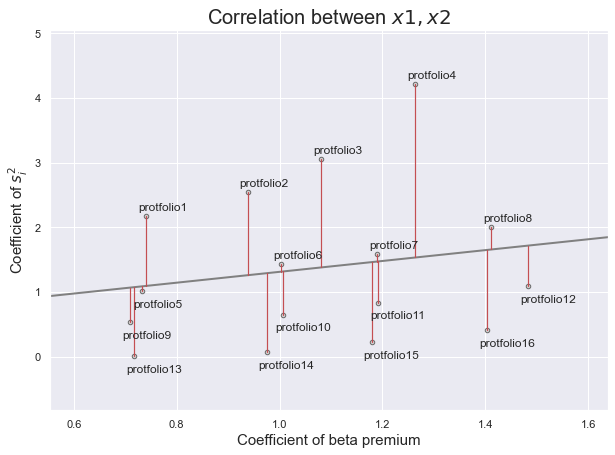

In [24]:
plt.figure(figsize = (10,7))
point_to_fitted_line(x1, x2, index = ['protfolio' + str(i+1) for i in factors.columns])
plt.style.use('ggplot')
plt.title('Correlation between $x1, x2$', fontsize = 20)
plt.ylabel('Coefficient of $s_i^2$',fontsize = 15)
plt.xlabel('Coefficient of beta premium', fontsize = 15);

In [25]:
corrtest = sm.OLS(x1,x2).fit()
corrtest.summary()

/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                factor1   R-squared (uncentered):                   0.599
Model:                            OLS   Adj. R-squared (uncentered):              0.572
Method:                 Least Squares   F-statistic:                              22.38
Date:                Tue, 17 May 2022   Prob (F-statistic):                    0.000268
Time:                        16:02:01   Log-Likelihood:                         -16.819
No. Observations:                  16   AIC:                                      35.64
Df Residuals:                      15   BIC:                                      36.41
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
factor2        0.4749      0.100      4.731      0.000       0.261       0.689
==============================================================================
Omnibus:                        1.403   Durbin-Watson:                   0.181
Prob(Omnibus):                  0.496   Jarque-Bera (JB):                1.177
Skew:                          -0.551   Prob(JB):                        0.555
Kurtosis:                       2.258   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, 'Coefficient of Beta Premium on Market Portfolio ($x_1$)')

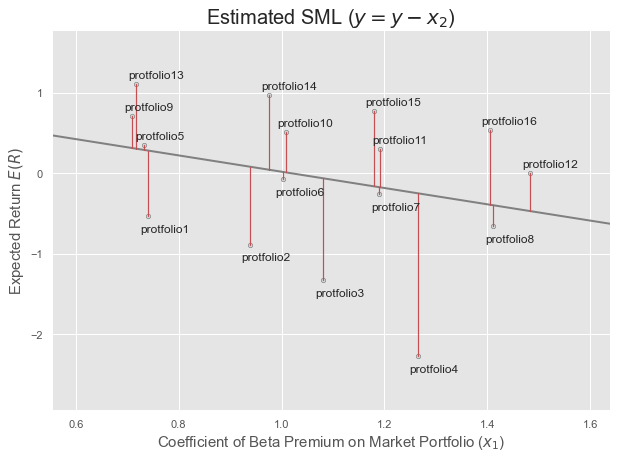

In [26]:
plt.figure(figsize = (10,7))
point_to_fitted_line(x1, y-x2, index = ['protfolio' + str(i+1) for i in factors.columns])
plt.style.use('ggplot')
plt.title('Estimated SML ($y = y - x_2$)', fontsize = 20)
plt.ylabel('Expected Return $E(R)$',fontsize = 15)
plt.xlabel('Coefficient of Beta Premium on Market Portfolio ($x_1$)', fontsize = 15)

Text(0.5, 0, 'Coefficient of $s_i^2$ ($x_2$)')

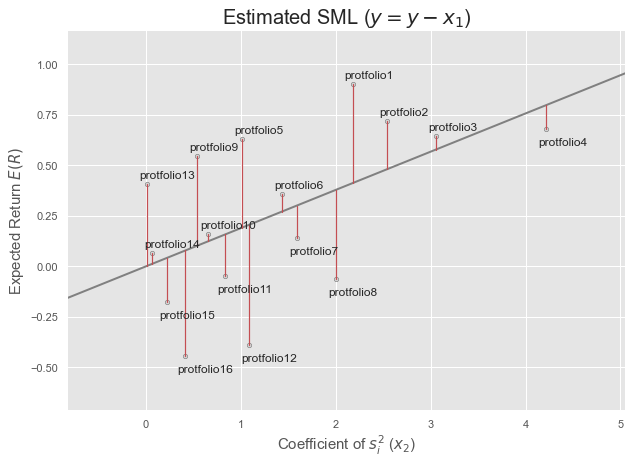

In [27]:
plt.figure(figsize = (10,7))
point_to_fitted_line(x2, y-x1, index = ['protfolio' + str(i+1) for i in factors.columns])
plt.style.use('ggplot')
plt.title('Estimated SML ($y = y - x_1$)', fontsize = 20)
plt.ylabel('Expected Return $E(R)$',fontsize = 15)
plt.xlabel('Coefficient of $s_i^2$ ($x_2$)', fontsize = 15)

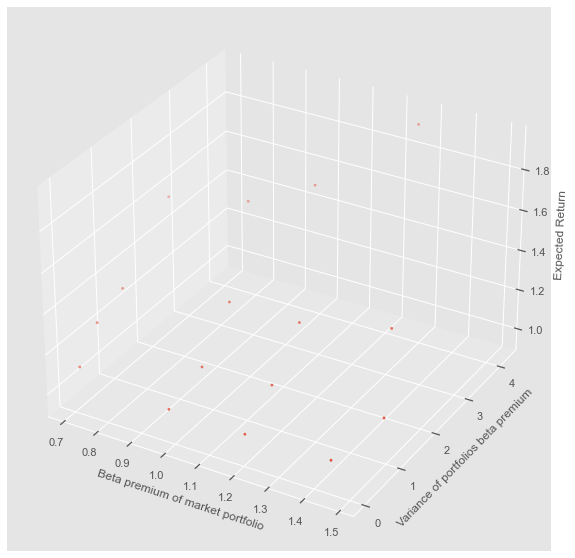

In [28]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, marker='.',  cmap='ro')
ax.set_xlabel('Beta premium of market portfolio')
ax.set_ylabel('Variance of portfolios beta premium')
ax.set_zlabel('Expected Return')
plt.grid()

## Conclusion

The estimated model is following that

$\hat{\overline{r_i - r_f}} = 1.3923^{***} - 0.3801^{**}\beta_i + 0.2444^{***} s_i^2$

where $s_i^2 = {1 \over n-1} (r_i - \bar{r})^2, r_f = 0$

- The $\gamma_2$ means a risk when we choose assets which is not market equilibrium level. Since $\gamma_2$ has positive coefficient, more risky assets we choose, higher return we can get.

- According to estimated model, It appears that both $\gamma_1$, $\gamma_2$ are significant values. It means both variables are significant level of result, which are beta premium and sample variance of risky assets based on them. The beta premium of market portfolio affect negative effect. That means when the individual economic agents choose only market portfolio, they could get a negative return. But when they choose the assets which is not market equilibrium level, They would get a positive return.

- Unlike CAPM, SML provides a rational reason for individual economic agents to select assets which is not market level not choosing market portfolios.